**Z - Transform Plot**

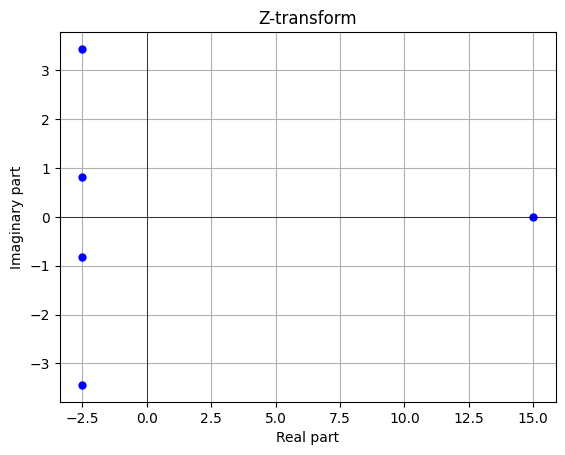

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def z_transform(signal):
    """
    Compute the Z-transform of a discrete signal.

    Parameters:
        signal (array_like): Input signal.

    Returns:
        z_transform (array_like): Z-transform of the input signal.
    """
    N = len(signal)
    z_transform = np.zeros(N, dtype=complex)

    for k in range(N):
        z_transform[k] = sum(signal[n] * np.exp(-1j * 2 * np.pi * k * n / N) for n in range(N))

    return z_transform

def plot_z_transform(z_transform):
    """
    Plot the Z-transform in the complex plane.

    Parameters:
        z_transform (array_like): Z-transform of a signal.

    Returns:
        None
    """
    plt.plot(np.real(z_transform), np.imag(z_transform), 'bo', markersize=5)
    plt.title('Z-transform')
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.show()

# Example usage
# Define the discrete signal
discrete_signal = np.array([1, 2, 3, 4, 5])
# Compute the Z-transform
z_transform_signal = z_transform(discrete_signal)
# Plot the Z-transform
plot_z_transform(z_transform_signal)


**Casual & Non-Casual System**

In [2]:
def get_sequence(name):
  """
  Gets a sequence of numbers from the user.

  Args:
    name: The name of the sequence (e.g., "X(n)" or "Y(n)").

  Returns:
    A list of integers representing the sequence.
  """
  sequence_str = input(f"Enter the sequence {name} (e.g., 1, 2, 3): ")
  return [int(num) for num in sequence_str.split(",")]

def calculate_response(x, h):
  """
  Calculates the system response for a given input sequence and impulse response.

  Args:
    x: A list representing the input sequence.
    h: A list representing the impulse response.

  Returns:
    A list representing the system response.
  """
  y = []
  for n in range(len(x)):
    y_n = 0
    for k in range(len(h)):
      if n >= k:  # Consider only past and current inputs for causality check
        y_n += h[k] * x[n - k]
    y.append(y_n)
  return y

def check_causal(h):
  """
  Checks if a given impulse response is causal.

  Args:
    h: A list representing the impulse response.

  Returns:
    True if the system is causal, False otherwise.
  """
  for i in range(1, len(h)):
    if h[i] != 0:
      return False
  return True

def check_noncausal(h):
  """
  Checks if a given impulse response is non-causal.

  Args:
    h: A list representing the impulse response.

  Returns:
    True if the system is non-causal, False otherwise.
  """
  return not check_causal(h)  # Non-causal if not causal

# Get input sequences
x = get_sequence("X(n)")
h = get_sequence("h(n)")

# Calculate system response
y = calculate_response(x, h)

# Print the response
print(f"System Response Y(n): {y}")

# Check for causality and non-causality
if check_causal(h):
  print("Causal System: The system has a causal impulse response.")
else:
  print("Causal System: The system does not have a causal impulse response.")

if check_noncausal(h):
  print("Non-Causal System: The system has a non-causal impulse response.")
else:
  print("Non-Causal System: The system does not have a non-causal impulse response.")


Enter the sequence X(n) (e.g., 1, 2, 3): 1, 2, 3
Enter the sequence h(n) (e.g., 1, 2, 3): 4,  5,  6
System Response Y(n): [4, 13, 28]
Causal System: The system does not have a causal impulse response.
Non-Causal System: The system has a non-causal impulse response.


**Type of System**

In [9]:
import numpy as np

def is_linear(x1, y1, x2, y2):
  """
  Checks if the system satisfies the superposition principle for linearity.

  Args:
      x1, y1: Input and output for signal 1.
      x2, y2: Input and output for signal 2.

  Returns:
      True if the system is linear, False otherwise.
  """
  a = 2  # Scaling factor (example)
  scaled_sum_x = a * x1 + x2
  expected_sum_y = a * y1 + y2
  return np.allclose(apply_system(scaled_sum_x), expected_sum_y)

def is_time_invariant(x, y, t_shift):
  """
  Checks if the system is time-invariant by applying a time shift to the input.

  Args:
      x, y: Input and output signals.
      t_shift: Time shift value.

  Returns:
      True if the system is time-invariant, False otherwise.
  """
  shifted_x = np.roll(x, int(t_shift))  # Shift input by t_shift samples
  return np.allclose(apply_system(shifted_x), np.roll(y, int(t_shift)))

def is_homogeneous(x, y, a):
  """
  Checks if the system is homogeneous (output scales proportionally with input scaling).

  Args:
      x, y: Input and output signals.
      a: Scaling factor.

  Returns:
      True if the system is homogeneous, False otherwise.
  """
  scaled_x = a * x
  scaled_y = apply_system(scaled_x)
  return np.allclose(a * y, scaled_y)

def check_bounded_input_bounded_output(x, y):
  """
  Checks if the system exhibits Bounded-Input Bounded-Output (BIBO) stability.

  Args:
      x, y: Input and output signals.

  Returns:
      True if BIBO stability is potentially satisfied, False otherwise.
  """
  # This is a heuristic check. A truly stable system guarantees BIBO.
  max_input = np.max(np.abs(x))
  max_output = np.max(np.abs(y))
  for C in range(1, 11):  # Check for a scaling factor C
    if max_output <= C * max_input:
      return True
  return False

def apply_system(x):
  """
  This function simulates the system behavior. Replace this with your actual system implementation.

  Args:
      x: Input signal.

  Returns:
      Output signal after applying the system.
  """
  # Example: Simulate a linear time-invariant system with y(t) = 2*x(t)
  return 2 * x

def test_system_properties(x, y):
  """
  Analyzes the system and tests for linearity, non-linearity, homogeneity, and potential stability.

  Args:
      x, y: Input and output signals.
  """
  linear = is_linear(x[::2], y[::2], x[1::2], y[1::2])
  time_invariant = is_time_invariant(x, y, 1)
  homogeneous = is_homogeneous(x, y, 2)
  bibo_stability = check_bounded_input_bounded_output(x, y)

  print("Type of System:")
  print(f"  Linear: {linear}")
  print(f"  Time-Invariant: {time_invariant}")
  print(f"  Homogeneous: {homogeneous}")
  print(f"  Potential BIBO Stability: {bibo_stability}")  # Indicate potential stability

  if not linear:
    print("  (Non-linear)")

# Example usage (replace with your actual input/output data)
x = np.sin(2*np.pi*np.arange(10))  # Sample input signal
y = apply_system(x)  # Apply the system to the input

test_system_properties(x, y)

Type of System:
  Linear: True
  Time-Invariant: True
  Homogeneous: True
  Potential BIBO Stability: True


**Signal Analysis**

Signal Analysis:
	- Even/Odd: Odd
	- Energy/Power: Energy
	- Periodic/Aperiodic: Aperiodic


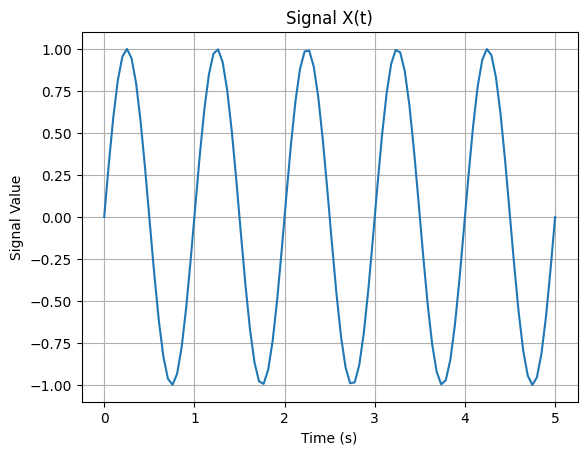

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_signal(x, t):
  """
  Analyzes the properties of a given signal.

  Args:
      x (np.ndarray): The signal values.
      t (np.ndarray): The corresponding time values (optional).

  Returns:
      dict: A dictionary containing the analysis results.
  """

  results = {}

  # Even or Odd
  if np.allclose(x, -x):
    results["Even/Odd"] = "Even"
  else:
    results["Even/Odd"] = "Odd"

  # Energy or Power Calculation (using defined variable t)
  energy = np.sum(x**2) * np.diff(t)[0]  # Integral of squared signal over time
  power = np.mean(x**2)  # Average squared signal
  if np.isfinite(energy):
    results["Energy/Power"] = "Energy"
  else:
    results["Energy/Power"] = "Power"

  # Periodic or Aperiodic
  period = np.ptp(np.diff(t[x != 0]))  # Time difference between non-zero samples
  if np.isclose(period, 0):
    results["Periodic/Aperiodic"] = "Aperiodic"
  else:
    results["Periodic/Aperiodic"] = f"Periodic (period: {period:.2f}s)"

  # Random or Deterministic
  # (Difficult to determine definitively without additional information)
  # results["Random/Deterministic"] = "Deterministic (assumed)"

  return results

def plot_signal(x, t):
  """
  Plots the signal.

  Args:
      x (np.ndarray): The signal values.
      t (np.ndarray): The corresponding time values.
  """

  plt.plot(t, x)
  plt.xlabel("Time (s)")
  plt.ylabel("Signal Value")
  plt.title("Signal X(t)")
  plt.grid(True)
  plt.show()

# Get signal input (replace with your actual signal generation or data)
t = np.linspace(0, 5, 100)  # Sample time range
x = np.sin(2*np.pi*t)  # Sample signal (sine wave)

# Analyze and print signal properties
analysis = analyze_signal(x, t)
print("Signal Analysis:")
for key, value in analysis.items():
  print(f"\t- {key}: {value}")

# Plot the signal
plot_signal(x, t)


**Type of Signal**

In [8]:
def find_period(signal):
  """
  This function finds the period (N) of a discrete signal.

  Args:
    signal: A list representing the discrete signal.

  Returns:
    The period (N) of the signal, or None if the signal is aperiodic.
  """
  signal_length = len(signal)

  # Initial guess for the period
  period = signal_length

  for shift in range(1, signal_length):
    # Check for perfect match between original and shifted signal
    if all(signal[i] == signal[i + shift] for i in range(signal_length - shift)):
      period = shift
      break

  if period == signal_length:
    # Signal is aperiodic
    return None
  else:
    return period

def check_signal_type(signal):
  """
  This function checks if a discrete signal is an energy signal or a power signal.

  Args:
    signal: A list representing the discrete signal.

  Returns:
    A string indicating the signal type: "energy" or "power".

  Raises:
    ValueError: If the signal is neither an energy signal nor a power signal.
  """

  # Calculate the sum of the squared values of the signal
  sum_squared = sum(x**2 for x in signal)

  # Check if the sum is infinite (power signal) or finite (energy or neither)
  if sum_squared == float('inf'):
    return "power"
  elif sum_squared > 0 and sum_squared < float('inf'):
    return "energy"
  else:
    raise ValueError("Signal is neither an energy nor a power signal.")

# Example usage
signal = [1, 2, 3, 4, 1, 2, 3, 4]  # Periodic signal with period 4
period = find_period(signal)

if period is None:
  print("Signal is aperiodic")
else:
  print("Signal is periodic with period", period)

# Additional example for signal type check
#another_signal = [1, 2, 3, 0, 0]  # Replace with your actual signal
signal_type = check_signal_type(signal)
print("The signal is a", signal_type, "signal.")


Signal is periodic with period 4
The signal is a energy signal.
